# Bank Customer Churn Prediction Using Artificial Neural Network (ANN)

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in banking. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
df = pd.read_csv("Bank_customer_churn_data.csv")

In [50]:
df.shape

(10000, 14)

In [51]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5805,5806,15814236,Kay,537,Spain,Female,38,1,96939.06,1,1,1,102606.92,0
502,503,15714485,Udinese,774,France,Male,60,5,85891.55,1,1,0,74135.48,1
5985,5986,15702145,Edments,705,Spain,Male,33,7,68423.89,1,1,1,64872.55,0
7583,7584,15643574,Odinakachukwu,682,France,Male,26,8,0.00,2,1,0,178373.43,0
4882,4883,15771750,Sawtell,655,Germany,Female,36,10,122314.39,1,1,0,9181.66,0


By looking at above sample data, it seems, there are few columns, like RowNumber, customerId etc. has too many discrete valkues nd hence are of no use for the purpose of modeling.

Lets check for number of unique values for each columns

In [52]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [53]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

It seems that, RowNumbers and Customer ID has as many values as number of rows in the dta. Hence we need to <b> remove RowNumbers and Customer ID</b>.

We cn also <b> remove the surname </b>, as it has 2932 discrete values and seems of no use for model building.

We will <b>keep credit score</b>, which is of integer type having 460 unique values, this seems a continuous variable.

Geography has 3 values and Gender has 2 values, both are of object type. Hence we need to Lable Encode them. We will do the same using Label Encoder.

Age, Tenure both are of integer type, either we can keep them as it is or we can make ranges. Here I am keeping them as it is. We may need to <b> scale </b> them in order to get effecient model.

Balance and Number of product, we will keep them as it is.

HasCr Card and IsActiveMember, both has only 2 values, and thats too of integer type, so we will keep them as it is.

EstimatedSalary as it is. We may need to scale this variable.

Exited 2 values of Integer type. We will keep this as it is. It will be my target variable.

In [54]:
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [55]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [56]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [57]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [58]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [59]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [60]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [61]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']


One hot encoding for categorical columns

In [91]:
df1 = pd.get_dummies(data=df, columns=['Geography'],drop_first=True)
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

Dummy Value Trape

In [92]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
310,652,1,80,4,0.00,2,1,1,188603.07,0,0,0
921,609,0,61,1,0.00,1,1,0,22447.85,1,0,1
7477,677,1,56,0,119963.45,1,0,0,158325.87,1,0,0
4964,466,1,41,3,33563.95,2,1,0,178994.13,1,0,0
3094,480,1,25,3,174330.35,2,0,0,181647.13,0,1,0


In [93]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [94]:
cols_to_scale = ['CreditScore','Age','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [95]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

Lets check for the missing value

In [96]:
print(df1.isna().sum())

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
dtype: int64


As we can see above,There isnt any missing value. So wedo not need to do any missing value treatment.

In [97]:
df1.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [98]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
3865,0.546,0,0.297297,6,0.000000,2,1,1,0.330569,0,0,0
279,0.728,0,0.378378,1,0.000000,1,1,0,0.760854,1,0,0
8442,0.496,1,0.216216,4,0.000000,2,0,0,0.304442,0,0,0
3323,0.274,1,0.175676,1,0.000000,2,1,0,0.793769,0,0,1
1579,0.536,0,0.310811,8,0.150271,1,1,1,0.978913,0,1,0
6163,0.276,1,0.135135,7,0.554991,2,1,0,0.533991,0,1,0
7721,0.814,0,0.202703,1,0.486607,1,1,0,0.212868,0,1,0
7751,0.800,1,0.283784,6,0.000000,2,0,0,0.096273,0,0,1
5057,0.806,1,0.378378,3,0.444454,3,1,0,0.797902,1,1,0
1177,0.552,0,0.040541,1,0.000000,2,1,0,0.331135,0,0,0


Now our data looks fine, lets break it into Dependent (X) nd independent (y) variable and then do the train test split.

In [99]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [101]:
X_train.shape

(8000, 11)

In [102]:
X_test.shape

(2000, 11)

In [103]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,6,0.000000,2,0,0,0.096273,0,1
4154,0.752,0,0.216216,3,0.000000,2,1,0,0.981478,0,0
3881,0.476,1,0.621622,3,0.000000,1,1,1,0.948551,0,0
9238,0.846,1,0.432432,4,0.000000,2,1,0,0.646869,0,0
5210,0.402,0,0.229730,7,0.517012,2,0,0,0.434670,0,0
7487,0.602,1,0.513514,4,0.000000,1,0,0,0.421898,0,0
7542,0.314,1,0.216216,4,0.000000,2,1,1,0.303413,0,1
7524,0.620,1,0.297297,8,0.666330,1,1,1,0.925815,0,0
9412,0.750,0,0.108108,6,0.393324,1,0,0,0.668609,0,0
6377,0.684,0,0.202703,9,0.000000,1,1,0,0.567526,0,0


In [104]:
len(X_train.columns)

11

# Build a model (ANN) in tensorflow/keras

In [105]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(11,), activation='relu'),
    #keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 256us/sample - loss: 0.5206 - accuracy: 0.7789
Epoch 2/100
8000/8000 [==============================] - 1s 123us/sample - loss: 0.4807 - accuracy: 0.7969
Epoch 3/100
8000/8000 [==============================] - 1s 141us/sample - loss: 0.4654 - accuracy: 0.8008
Epoch 4/100
8000/8000 [==============================] - 1s 149us/sample - loss: 0.4583 - accuracy: 0.8054
Epoch 5/100
8000/8000 [==============================] - 1s 143us/sample - loss: 0.4538 - accuracy: 0.8060
Epoch 6/100
8000/8000 [==============================] - 1s 113us/sample - loss: 0.4497 - accuracy: 0.8087
Epoch 7/100
8000/8000 [==============================] - 1s 117us/sample - loss: 0.4466 - accuracy: 0.8110
Epoch 8/100
8000/8000 [==============================] - 1s 123us/sample - loss: 0.4437 - accuracy: 0.8114
Epoch 9/100
8000/8000 [==============================] - 1s 122us/sample - loss: 0.4415 - accuracy: 0.8127
Epoch 10/100
80

8000/8000 [==============================] - 1s 68us/sample - loss: 0.3678 - accuracy: 0.8478
Epoch 77/100
8000/8000 [==============================] - 1s 68us/sample - loss: 0.3676 - accuracy: 0.8481
Epoch 78/100
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3679 - accuracy: 0.8481
Epoch 79/100
8000/8000 [==============================] - 1s 102us/sample - loss: 0.3661 - accuracy: 0.8512
Epoch 80/100
8000/8000 [==============================] - 1s 129us/sample - loss: 0.3660 - accuracy: 0.8484
Epoch 81/100
8000/8000 [==============================] - 1s 133us/sample - loss: 0.3650 - accuracy: 0.8496
Epoch 82/100
8000/8000 [==============================] - 1s 133us/sample - loss: 0.3652 - accuracy: 0.8509
Epoch 83/100
8000/8000 [==============================] - 1s 138us/sample - loss: 0.3648 - accuracy: 0.8501
Epoch 84/100
8000/8000 [==============================] - 1s 154us/sample - loss: 0.3649 - accuracy: 0.8501
Epoch 85/100
8000/8000 [====================

In [107]:
model.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 172us/sample - loss: 0.3676 - accuracy: 0.8530


[0.36758335995674135, 0.853]

yp = model.predict(X_test)

In [108]:
yp[:5]

array([[0.06488474],
       [0.06677993],
       [0.06985746],
       [0.07146972],
       [0.16352826]], dtype=float32)

In [109]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [110]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [111]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.67      0.27      0.39       405

    accuracy                           0.82      2000
   macro avg       0.75      0.62      0.64      2000
weighted avg       0.80      0.82      0.79      2000



Text(69.0, 0.5, 'Truth')

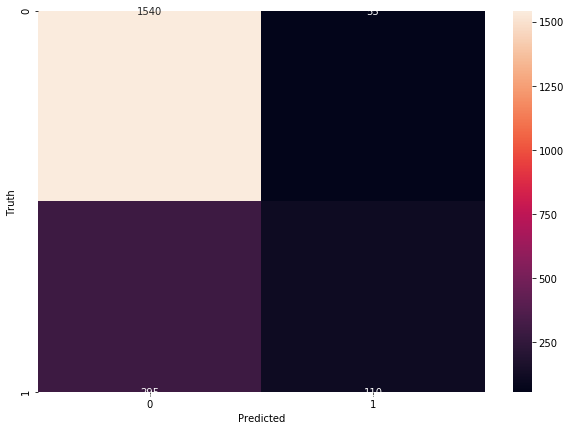

In [46]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')